Метод Гревиля

Пусть матрица $A$ получается из $A_1$ дописыванием столбца $\alpha$ справа: $A = (A_1, \alpha)$

1) Случай $A_1\cdot A_1^{\dagger} \cdot \alpha = \alpha:$

Введем: $\beta = \frac{(E - A_1\cdot A_1^{\dagger})\cdot \alpha}{\|(E - A_1\cdot A_1^{\dagger})\cdot \alpha\|^2_2}$

Тогда псевдообратная матрица: $A^{\dagger} = \left(\begin{array}{cc}
A_1^{\dagger}\cdot (E - \alpha \cdot \beta^{T})  \\
\beta^{T}
\end{array}\right)$

1) Случай $A_1\cdot A_1^{\dagger} \cdot \alpha \neq \alpha:$

Введем: $\gamma = \frac{A_1^{\dagger,T}\cdot A_1^{\dagger}\cdot \alpha}{1 + \|A_1^{\dagger}\cdot \alpha\|^2_2}$

Тогда псевдообратная матрица: $A^{\dagger} = \left(\begin{array}{cc}
A_1^{\dagger}\cdot (E - \alpha \cdot \gamma^{T})  \\
\gamma^{T}
\end{array}\right)$

Таким образом мы можем взять первый столбец и последовательно добавляя новые столбцы будем производить вычисления псевдообратных матриц.

Выводы:

Способ является удобным, если мы например знаем псевдообратную для исходной матрицы и нужно посчитать псевдообратную для матрицы к которой добавили столбец или строку.
Если такого не известно, то метод медленне встроенного.

In [177]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import time

In [178]:
n = 500
m = 300
A = np.random.randn(n, m)

In [179]:
#На вход подается вся матрица(A), матрица из первых столбцов(A1) и псевдообратная для A1(A1_t)
def Grevil(A, A1, A1_t):
  start1 = time.time()
  A2 = A1
  A2_t = A1_t
  for i in range(A.shape[1] - A1.shape[1]):
    alpha = A[:,i + A1.shape[1]].reshape(-1,1)
    if np.all(A2 @ A2_t @ alpha == alpha):
      gamma = (np.transpose(A2_t) @ A2_t @ alpha) / (1 + np.linalg.norm(A2_t @ alpha)**2)
      A2 = np.hstack((A2,alpha))
      A2_t = np.vstack((A2_t @ (np.eye(alpha.shape[0]) - alpha @ np.transpose(gamma)),np.transpose(gamma)))
    else:
      betta = (np.eye(A2.shape[0]) - A2 @ A2_t)@alpha / (np.linalg.norm((np.eye(A2.shape[0]) - A2 @ A2_t)@alpha)**2)
      A2 = np.hstack((A2,alpha))
      A2_t = np.vstack((A2_t @ (np.eye(alpha.shape[0]) - alpha @ np.transpose(betta)),np.transpose(betta)))
  end1 = time.time()
  t1 = end1 - start1
  return(A2_t, t1)

In [180]:
A1 = A[:,0].reshape(-1,1)
A1_t = np.linalg.pinv(A1)
A1.shape[1]

1

In [181]:
(A1_t, t1) = Grevil(A, A1, A1_t)

In [182]:
start2 = time.time()
B = np.linalg.pinv(A)
end2 = time.time()
t2 = end2 - start2

In [183]:
np.linalg.norm(A1_t - B)

1.394657651187196e-14

In [184]:
print(t1)
print(t2)

3.9494001865386963
0.054627180099487305


Видно, что время больше чем у встроенного метода, но метод может быть полезен, когда уже есть псевдообратная матрица, но к исходной матрице добавляется столбец

Здесь и далее работаем с такими случаями

In [185]:
A2 = A[:,:-1]
A2_t = np.linalg.pinv(A2)
A2_t.shape

(A2_t, t3) = Grevil(A, A2, A2_t)

In [186]:
np.linalg.norm(A2_t - B)

5.714796617447679e-15

In [187]:
print(t3)
print(t2)

0.0218813419342041
0.054627180099487305


Сравнение времени при разном числе столбцов 1 (Просто считаем сразу)

In [199]:
m = np.arange(50,500,50)
n = m

In [200]:
err = []
t = []
tt = []
for i in range(len(m)):
  m0 = m[i]
  n0 = n[i]
  A = np.random.randn(n0, m0)
  A1 = A[:,0].reshape(-1,1)
  A1_t = np.linalg.pinv(A1)

  (A2_t, t3) = Grevil(A, A1, A1_t)
  start2 = time.time()
  B = np.linalg.pinv(A)
  end2 = time.time()

  err.append(np.linalg.norm(A1_t - B))
  t.append(t3)
  tt.append(end2 - start2)

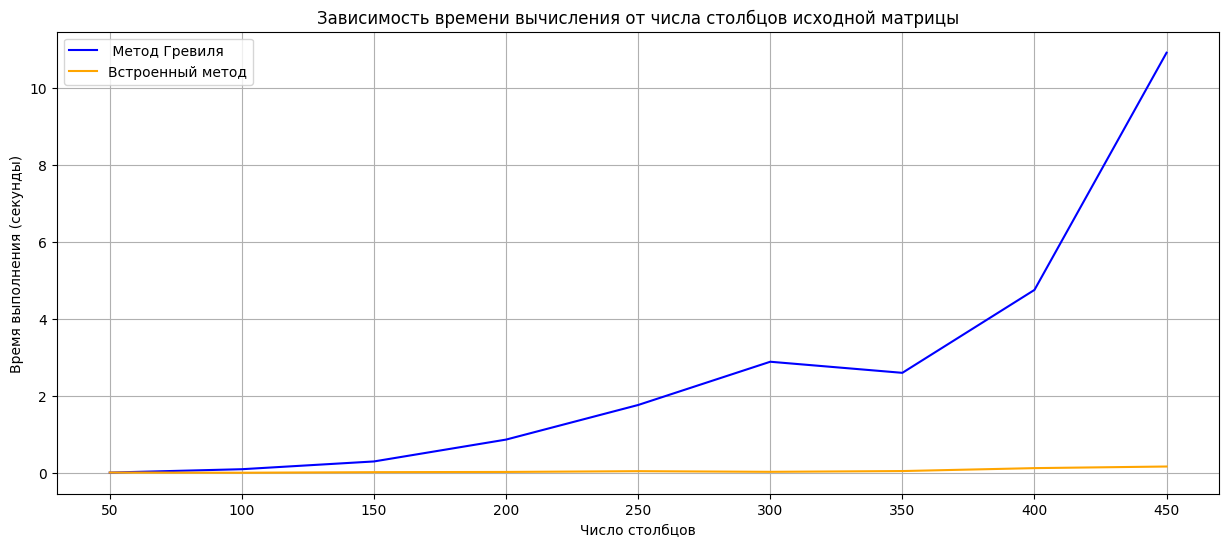

In [201]:
plt.figure(figsize=(15, 6))
plt.plot(m, t, label=' Метод Гревиля', color='blue', linestyle='-')
plt.plot(m, tt, label='Встроенный метод', color='orange', linestyle='-')
plt.xlabel('Число столбцов')
plt.ylabel('Время выполнения (секунды)')
plt.title('Зависимость времени вычисления от числа столбцов исходной матрицы')
plt.grid(True)
plt.legend()
plt.show()

Сравнение времени при разном числе столбцов 2 (Cлучай коглда знаем псевдообратную для матрицы без последнего столбца)

In [188]:
m = np.arange(50,500,50)
n = m

In [195]:
err = []
t = []
tt = []
for i in range(len(m)):
  m0 = m[i]
  n0 = n[i]
  A = np.random.randn(n0, m0)
  A2 = A[:,:-1]
  A2_t = np.linalg.pinv(A2)

  (A2_t, t3) = Grevil(A, A2, A2_t)
  start2 = time.time()
  B = np.linalg.pinv(A)
  end2 = time.time()

  err.append(np.linalg.norm(A2_t - B))
  t.append(t3)
  tt.append(end2 - start2)


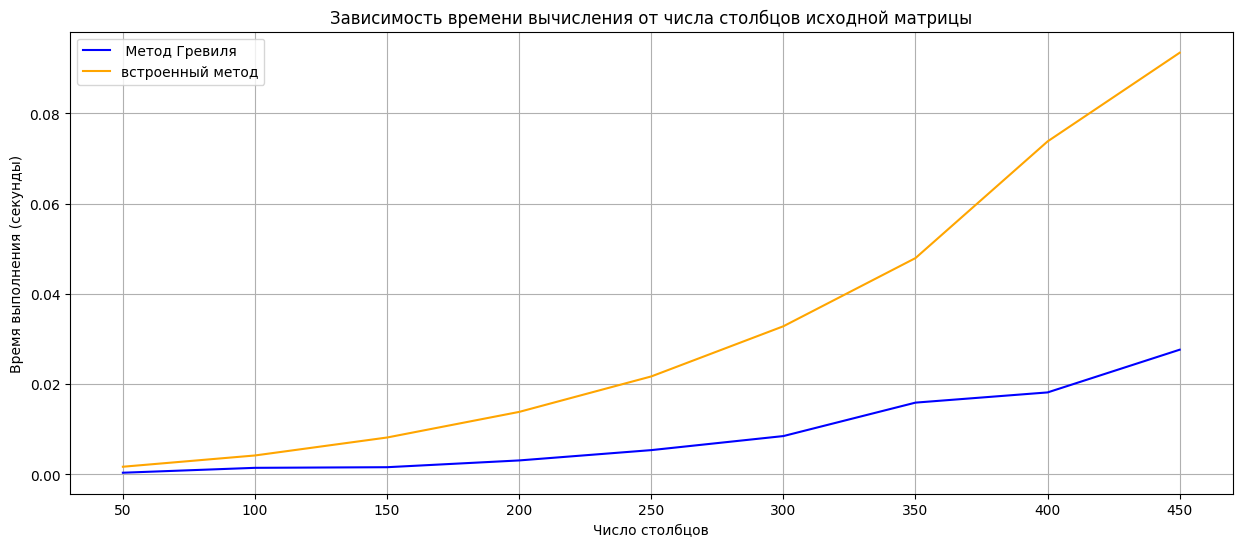

In [196]:
plt.figure(figsize=(15, 6))
plt.plot(m, t, label=' Метод Гревиля', color='blue', linestyle='-')
plt.plot(m, tt, label='Встроенный метод', color='orange', linestyle='-')
plt.xlabel('Число столбцов')
plt.ylabel('Время выполнения (секунды)')
plt.title('Зависимость времени вычисления от числа столбцов исходной матрицы')
plt.grid(True)
plt.legend()
plt.show()

Точность алгоритма при различном числе обусловленности.

In [197]:
n = 500
m = 350
cond = np.logspace(start=0, stop=4, num=50)
norm = np.array([])
for i in range(50):
  norm_j = np.array([])
  for j in range(10):
    A = np.random.randn(n, m)
    U, S, V = np.linalg.svd(A, full_matrices=False)
    S_modified = np.linspace(1, cond[i], m)
    A = np.dot(U, np.dot(np.diag(S_modified), V))

    A2 = A[:,:-1]
    A2_t = np.linalg.pinv(A2)

    (A2_t, t3) = Grevil(A, A2, A2_t)
    B = np.linalg.pinv(A)

    norm_j = np.append(norm_j, [np.linalg.norm(A2_t - B)])
  norm = np.append(norm, np.mean(norm_j))

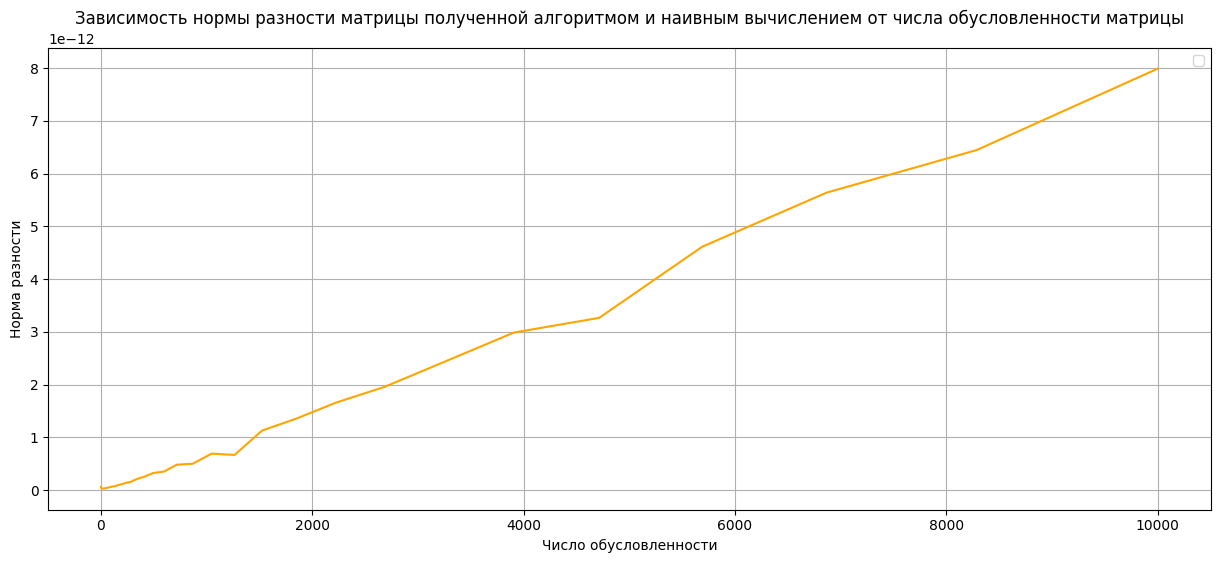

In [198]:
plt.figure(figsize=(15, 6))
plt.plot(cond, norm, color='orange', linestyle='-')
plt.xlabel('Число обусловленности')
plt.ylabel('Норма разности')
plt.title('Зависимость нормы разности матрицы полученной алгоритмом и наивным вычислением от числа обусловленности матрицы')
plt.grid(True)
plt.legend()
plt.show()